In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap

In [8]:

folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_textura_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))


In [9]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_z_cl= df_textura_z.drop(columns=['filename', 'label'])

In [10]:
df_textura_z_cl

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,-0.117970,-0.265037,0.573895,1.615441,0.261439,1.623821
1,-0.689035,-0.862073,1.111661,1.826963,-0.049338,1.866511
2,0.723027,0.707483,-0.528180,-0.424014,-0.919636,-0.447924
3,0.125226,0.337029,-0.517080,-0.809188,-0.678186,-0.788491
4,1.304987,1.643435,-1.718236,-0.716244,-1.826587,-0.709481
...,...,...,...,...,...,...
532,-0.277401,-0.521728,0.875899,0.606081,0.546989,0.543134
533,0.083434,-0.523298,1.088512,-0.232107,0.255967,-0.272234
534,-0.097836,-0.273793,0.451454,-0.024781,0.459498,-0.076473
535,-0.449770,-1.003507,1.655792,2.974858,0.716253,3.251952


Una vez el dataset está preparado se procede seguir el objetivo principal de esta parte de la práctica, aplicar el algoritmo de clustering DBSCAN para identificar subgrupos dentro de `ncRNA`
`DBSCAN` es un método basado en criterios locales que se apoya en el concepto de densidad de los puntos.
 * Se consideran clusters aquellas regiones del espacio con una alta densidad de puntos.
 * Las regiones con una baja densidad se podrán corresponder con puntos que no están asociados a la mayoría de los datos.
 
Los parámetros mínimos que utiliza la función `dbscan()` son `eps`y `minPts`. 
* ***Épsilon (eps)***: define el radio dentro del cual se consideran vecinos los puntos, es decir, especifica lo cerca que deben estar los puntos entre sí para ser considerados parte de un cluster. Esto significa que, si la distancia entre dos puntos es menor o igual a este valor de épsilon, estos puntos se consideran vecinos.
* ***Puntos mínimos (minPts)***: Define el número mínimo de vecinos que un punto necesita para ser considerado un punto central de un clúster.

Un punto será central si tiene al menos `minPts`vecinos, y será un punto borde si tiene menos de `minPts`, pero está dentro del `eps` de un punto central. Será ruido cuando no cumpla ninguna de estas condiciones. Al ajustar los parámetros, se busca minimizar el ruido y encontrar un balance entre puntos centrales y de borde, permitiendo identificar un número claro y significativo de clústeres separados.
Para determinar el valor de épsilon , se puede utilizar el gráfico de k-distancias mediantes la función `kNNdistplot()`. Esto calcula el promedio de distancias de los puntos a su k-vecinos más cercanos, se ordenan las distancias de menor a mayor y después se grafica. Donde se encuentre el cambio brusco o codo en la curva será el valor que representa el valor óptimo para `eps`. 
El parámetro `MinPts`se suele fijar en MinPts = d + 1 o MinPts = 2d - 1. Por tanto, se probarán valores de 41 y 79.

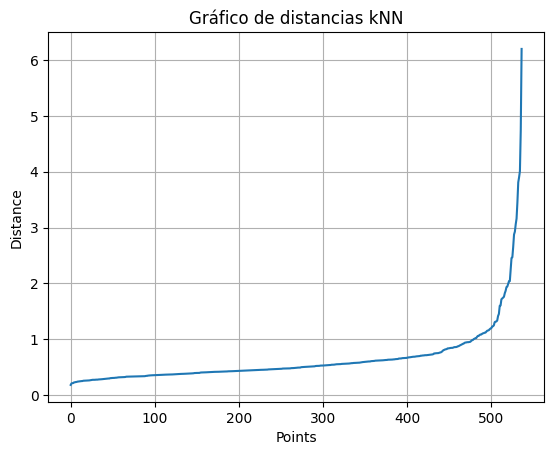

In [11]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_textura_z_cl)
distances, indices = neighbors_fit.kneighbors(df_textura_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [12]:
X_textura_z = np.array(df_textura_z_cl)

clustering = DBSCAN(eps=0.7, min_samples=4).fit(X_textura_z)

clustering.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1,  1,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0, -1,  0

In [13]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 76


In [14]:
y_true = df_textura_z['label'] 
y_pred = clustering.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN  -1    0   1
Etiqueta Real              
higher           6  262   0
smaller         70  194   5


In [15]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_textura_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")


Silhouette Score (sin ruido): 0.404


Se han probado muchas combinaciones de hiperparámetros y solo se consigue 1 cluster y mucho ruido, o muchos clusteres donde solo uno de ellos contiene todos los puntos
por eso se va a aplicar una reducción de la dimensionalidad con UMAP

Reducción de la dimensionalidad con UMAP

***UMAP** es úna técnica que permite reducir la dimensionalidad para vsualizaciín. Permite preservar una mayor parte de la estructura global que otros métodos como t-SNE, y es más eficaz computacionalmente. Este método, está basado en la teoría matemática de variedades,  el análisis de datos topológicos y la geometría de Riemann. UMAP básicamente funciona de la siguiente manera: utiliza aproximaciones a variedades locales y trata de unir sus respectivos conjuntos simpliciales difusos para construir una representación topológica del los datos con alta dimensionalidad. Con esto se consigue una representación topológica equivalente pero con una menor dimensión de los datos.
El paquete que se va a usar es `umap()` y se le van a justar los siguientes parámetros:
* ***n_neighbors***: número de vecinos cercanos. Con este parámetro se controla a qué se le quiere dar más importancia, si a las estructuras locales o a las globales. Un valor bajo, fuerza al UMAP a centrarse en detalles locales (en detrimento de una visión global), mientras que valores grandes fuerzan al algoritmos a centrarse en detalles globales (en detrimento de los pequeños detalles). Con 40 variables y 3796 observaciones, un valor de 35 equilibra la captación de patrones locales y globales, permitiendo que UMAP mantenga cierta coherencia en la estructura de los datos sin hacer que los clusters se mezclen demasiado.

* ***n_components***: número de dimensiones del espacio de salida. Se reducen los datos a tres dimensiones para poder representar los datos con más información que con una reducción a 2D.

* ***metric***: función utilizada para calcular la distancia entre dos puntos. Se utiliza esta métrica porque es la estándar y la que mejor funciona en la mayoría de representaciones.

* ***min_dist***: Controla qué tan juntos pueden estar los puntos en el espacio reducido. Un valor de 0.01 fuerza a UMAP a agrupar los puntos más cercanamente, lo que puede ser útil ya que se espera encontrar estructuras densas.

In [16]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model = umap.UMAP(n_neighbors=9, n_components=2,min_dist=0.01, random_state=42)  
X_umap = umap_model.fit_transform(X_textura_z)


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_14980\2629678783.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


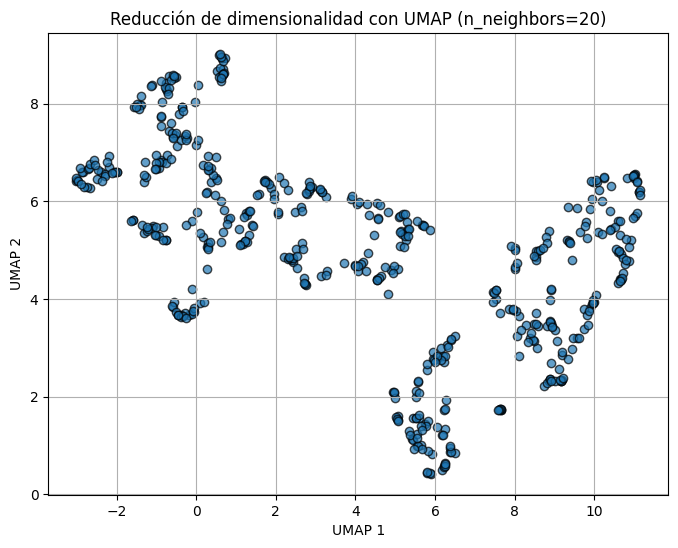

In [17]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP (n_neighbors=20)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()


In [33]:
clustering_umap_z = DBSCAN(eps=1.5, min_samples=9).fit(X_umap)
clustering_umap_z.labels_

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [35]:
y_true = df_textura_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher          173   95
smaller          64  205


In [36]:

mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.571


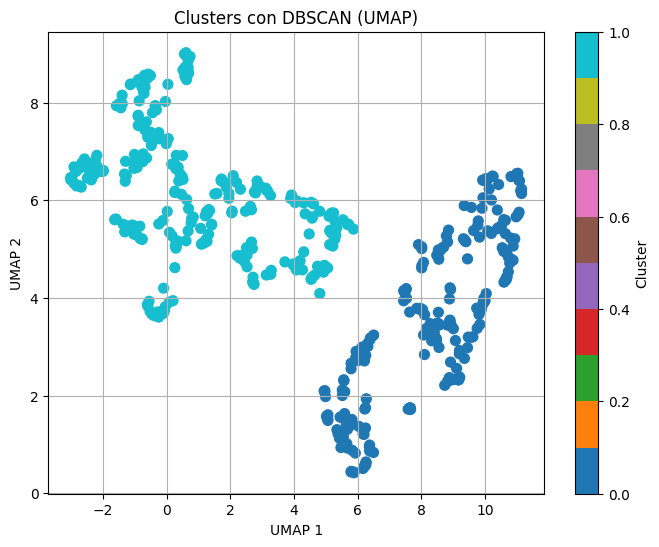

In [37]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

se hace lo mismo pero con la normalización min-max

In [38]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_mm_cl= df_textura_mm.drop(columns=['filename', 'label'])

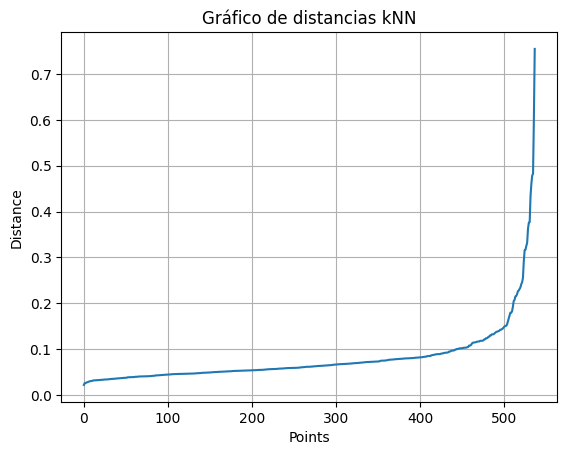

In [39]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_textura_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_textura_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [40]:
X_textura_mm = np.array(df_textura_mm_cl)

clustering_mm = DBSCAN(eps=0.19, min_samples=7).fit(X_textura_mm)

clustering.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1,  1,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0, -1,  0

In [41]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors=9, n_components=2,min_dist=0.01, random_state=42)  
X_umap_mm = umap_model_mm.fit_transform(X_textura_mm)


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_14980\3564600941.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


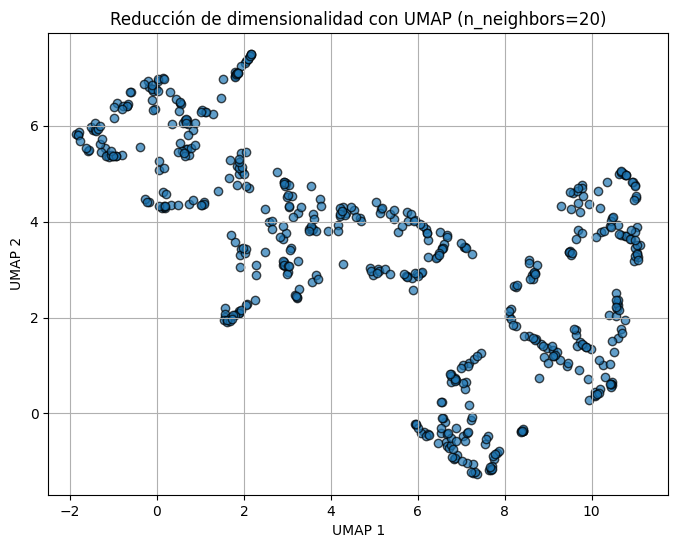

In [42]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP (n_neighbors=20)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()  

In [54]:
clustering_umap_mm = DBSCAN(eps=1, min_samples=9).fit(X_umap_mm)
clustering_umap_mm.labels_

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [56]:
y_true = df_textura_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher          173   95
smaller          61  208


In [57]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.547


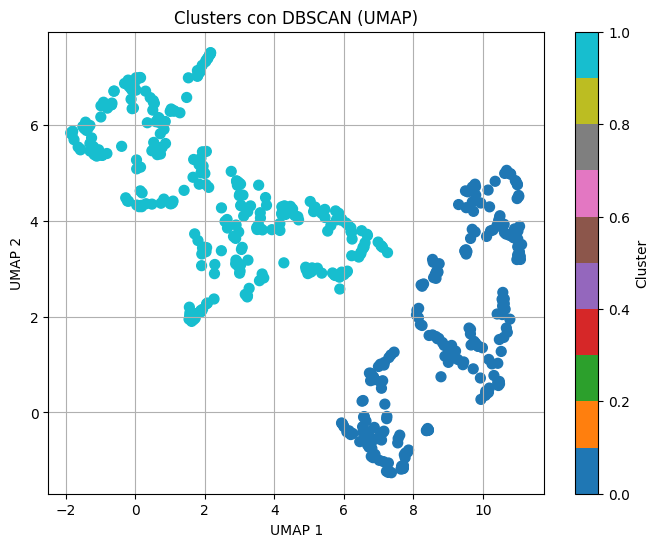

In [58]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()